Prediction Model on Car Price Dataset

In [1]:
import pandas as pd
import numpy as np 
import seaborn as sn 
import matplotlib.pyplot as plt

Importing Our Dataset

In [2]:
df = pd.read_csv("car details v4.csv")

In [3]:
print(f"No of Rows: {df.shape[0]}")
print(f"No of Columns: {df.shape[1]}")

No of Rows: 2059
No of Columns: 20


In [4]:
df.head()

,Make,Model,Price,Year,Kilometer,Fuel Type,Transmission,Location,Color,Owner,Seller Type,Engine,Max Power,Max Torque,Drivetrain,Length,Width,Height,Seating Capacity,Fuel Tank Capacity
0,Honda,Amaze 1.2 VX i-VTEC,505000,2017,87150,Petrol,Manual,Pune,Grey,First,Corporate,1198 cc,87 bhp @ 6000 rpm,109 Nm @ 4500 rpm,FWD,3990.0,1680.0,1505.0,5.0,35.0
1,Maruti Suzuki,Swift DZire VDI,450000,2014,75000,Diesel,Manual,Ludhiana,White,Second,Individual,1248 cc,74 bhp @ 4000 rpm,190 Nm @ 2000 rpm,FWD,3995.0,1695.0,1555.0,5.0,42.0
2,Hyundai,i10 Magna 1.2 Kappa2,220000,2011,67000,Petrol,Manual,Lucknow,Maroon,First,Individual,1197 cc,79 bhp @ 6000 rpm,112.7619 Nm @ 4000 rpm,FWD,3585.0,1595.0,1550.0,5.0,35.0
3,Toyota,Glanza G,799000,2019,37500,Petrol,Manual,Mangalore,Red,First,Individual,1197 cc,82 bhp @ 6000 rpm,113 Nm @ 4200 rpm,FWD,3995.0,1745.0,1510.0,5.0,37.0
4,Toyota,Innova 2.4 VX 7 STR [2016-2020],1950000,2018,69000,Diesel,Manual,Mumbai,Grey,First,Individual,2393 cc,148 bhp @ 3400 rpm,343 Nm @ 1400 rpm,RWD,4735.0,1830.0,1795.0,7.0,55.0


Getting Information of Our Dataset

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2059 entries, 0 to 2058
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Make                2059 non-null   object 
 1   Model               2059 non-null   object 
 2   Price               2059 non-null   int64  
 3   Year                2059 non-null   int64  
 4   Kilometer           2059 non-null   int64  
 5   Fuel Type           2059 non-null   object 
 6   Transmission        2059 non-null   object 
 7   Location            2059 non-null   object 
 8   Color               2059 non-null   object 
 9   Owner               2059 non-null   object 
 10  Seller Type         2059 non-null   object 
 11  Engine              1979 non-null   object 
 12  Max Power           1979 non-null   object 
 13  Max Torque          1979 non-null   object 
 14  Drivetrain          1923 non-null   object 
 15  Length              1995 non-null   float64
 16  Width 

Exploring Our Dataset

Checking features attribute which contains null value

In [6]:
df.isnull().mean()*100

Make                  0.000000
Model                 0.000000
Price                 0.000000
Year                  0.000000
Kilometer             0.000000
Fuel Type             0.000000
Transmission          0.000000
Location              0.000000
Color                 0.000000
Owner                 0.000000
Seller Type           0.000000
Engine                3.885381
Max Power             3.885381
Max Torque            3.885381
Drivetrain            6.605148
Length                3.108305
Width                 3.108305
Height                3.108305
Seating Capacity      3.108305
Fuel Tank Capacity    5.488101
dtype: float64

In [7]:
df.dropna(inplace=True)

In [8]:
print(f"No of Rows: {df.shape[0]}")
print(f"No of Columns: {df.shape[1]}")

No of Rows: 1874
No of Columns: 20


In [9]:
df.isnull().sum()

Make                  0
Model                 0
Price                 0
Year                  0
Kilometer             0
Fuel Type             0
Transmission          0
Location              0
Color                 0
Owner                 0
Seller Type           0
Engine                0
Max Power             0
Max Torque            0
Drivetrain            0
Length                0
Width                 0
Height                0
Seating Capacity      0
Fuel Tank Capacity    0
dtype: int64

C:\Users\meetn\AppData\Local\Temp\ipykernel_2724\2162858153.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sn.distplot(df['Price'])
c:\Users\meetn\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Price', ylabel='Density'>

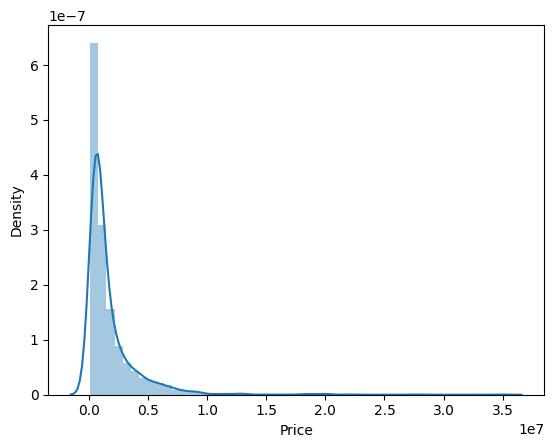

In [10]:
sn.distplot(df['Price'])

In [11]:
df.corr(numeric_only=True)

,Price,Year,Kilometer,Length,Width,Height,Seating Capacity,Fuel Tank Capacity
Price,1.000000,0.309381,-0.147276,0.568875,0.577100,0.092968,-0.024879,0.586109
Year,0.309381,1.000000,-0.291740,0.085178,0.182220,0.126849,-0.000113,0.044859
Kilometer,-0.147276,-0.291740,1.000000,0.037817,0.008479,0.085728,0.111103,0.052447
Length,0.568875,0.085178,0.037817,1.000000,0.797228,0.194704,0.298527,0.809812
Width,0.577100,0.182220,0.008479,0.797228,1.000000,0.326928,0.229056,0.791316
Height,0.092968,0.126849,0.085728,0.194704,0.326928,1.000000,0.695373,0.408717
Seating Capacity,-0.024879,-0.000113,0.111103,0.298527,0.229056,0.695373,1.000000,0.313928
Fuel Tank Capacity,0.586109,0.044859,0.052447,0.809812,0.791316,0.408717,0.313928,1.000000


Now Working on Make Column

<Axes: xlabel='Make'>

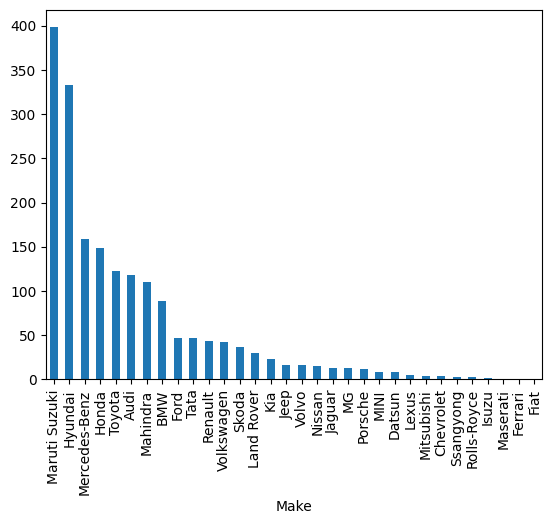

In [12]:
df['Make'].value_counts().plot(kind='bar')

this will replace values which have count less than 30 to NaN value

In [13]:
m = df['Make'].isin(df['Make'].value_counts().index[df['Make'].value_counts()<30])

In [14]:
df.loc[m,'Make'] = np.NaN

In [15]:
df['Make'].value_counts()

Make
Maruti Suzuki    398
Hyundai          333
Mercedes-Benz    159
Honda            149
Toyota           123
Audi             118
Mahindra         110
BMW               89
Tata              47
Ford              47
Renault           43
Volkswagen        42
Skoda             37
Land Rover        30
Name: count, dtype: int64

In [16]:
df['Make'].isnull().sum()

149

filling Null value

In [17]:
df['Make'].fillna(value='Other',inplace=True)

In [18]:
df['Make'].value_counts()

Make
Maruti Suzuki    398
Hyundai          333
Mercedes-Benz    159
Honda            149
Other            149
Toyota           123
Audi             118
Mahindra         110
BMW               89
Tata              47
Ford              47
Renault           43
Volkswagen        42
Skoda             37
Land Rover        30
Name: count, dtype: int64

now working on Engine feature

In [19]:
df['Engine'] = df['Engine'].map(lambda x:x.strip('cc'))

In [20]:
df['Engine'] = df['Engine'].astype(int)

Working On Max Power 

i will split Max Power Feature into two feature one is max power and other is power RPM

In [21]:
df['Max Power']

0        87 bhp @ 6000 rpm
1        74 bhp @ 4000 rpm
2        79 bhp @ 6000 rpm
3        82 bhp @ 6000 rpm
4       148 bhp @ 3400 rpm
               ...        
2053     85 bhp @ 6000 rpm
2054    138 bhp @ 3750 rpm
2055     55 bhp @ 5500 rpm
2056     70 bhp @ 6250 rpm
2057    188 bhp @ 4000 rpm
Name: Max Power, Length: 1874, dtype: object

creating Power RPM Feature by spliting max Power on the basis of '@'

In [22]:
df['Power RPM'] = df['Max Power'].map(lambda x:x.split('@')[1]) 

In [23]:
df['Power RPM']

0        6000 rpm
1        4000 rpm
2        6000 rpm
3        6000 rpm
4        3400 rpm
          ...    
2053     6000 rpm
2054     3750 rpm
2055     5500 rpm
2056     6250 rpm
2057     4000 rpm
Name: Power RPM, Length: 1874, dtype: object

spliting the Power RPM feature ont the basis of rpm

In [24]:
df['Power RPM'] = df['Power RPM'].map(lambda x:x.split('rpm')[0])

finding the mode value to replace ''

In [25]:
df['Power RPM'].mode()

0     6000 
Name: Power RPM, dtype: object

In [26]:
df['Power RPM'] = df['Power RPM'].replace(to_replace='',value='6000').astype(int)

so now Power RPM is created now i work on Max Power

In [27]:
df['Max Power'] = df['Max Power'].map(lambda x:x.split('@')[0])

In [28]:
df['Max Power'] = df['Max Power'].map(lambda x:x.split('bhp')[0])

In [29]:
df['Max Power'].mode()

0    89 
Name: Max Power, dtype: object

In [30]:
df['Max Power'] = df['Max Power'].replace(to_replace='',value='89').astype(float)

In [31]:
df['Max Power']

0        87.0
1        74.0
2        79.0
3        82.0
4       148.0
        ...  
2053     85.0
2054    138.0
2055     55.0
2056     70.0
2057    188.0
Name: Max Power, Length: 1874, dtype: float64

Now Working On Max Torque Feature (Repeating Same step as Max Power)

In [32]:
df['Max Torque']

0            109 Nm @ 4500 rpm
1            190 Nm @ 2000 rpm
2       112.7619 Nm @ 4000 rpm
3            113 Nm @ 4200 rpm
4            343 Nm @ 1400 rpm
                 ...          
2053         113 Nm @ 4500 rpm
2054         330 Nm @ 1600 rpm
2055          75 Nm @ 4000 rpm
2056         102 Nm @ 4000 rpm
2057         400 Nm @ 1750 rpm
Name: Max Torque, Length: 1874, dtype: object

In [33]:
df['Torque RPM'] = df['Max Torque'].map(lambda x:x.split('@')[1])

In [34]:
df['Torque RPM'] = df['Torque RPM'].map(lambda x:x.split('rpm')[0])

In [35]:
df['Torque RPM'] = df['Torque RPM'].astype(int)

In [36]:
df['Torque RPM']

0       4500
1       2000
2       4000
3       4200
4       1400
        ... 
2053    4500
2054    1600
2055    4000
2056    4000
2057    1750
Name: Torque RPM, Length: 1874, dtype: int32

Now Max Torque

In [37]:
df['Max Torque'] = df['Max Torque'].map(lambda x:x.split('@')[0])

In [38]:
df['Max Torque'] = df['Max Torque'].map(lambda x:x.split('Nm')[0]).astype(float)

In [39]:
df['Max Torque']

0       109.0000
1       190.0000
2       112.7619
3       113.0000
4       343.0000
          ...   
2053    113.0000
2054    330.0000
2055     75.0000
2056    102.0000
2057    400.0000
Name: Max Torque, Length: 1874, dtype: float64

Working On Fuel Type

In [40]:
df['Fuel Type'].value_counts()

Fuel Type
Diesel          954
Petrol          866
CNG              45
LPG               4
Hybrid            3
CNG + CNG         1
Petrol + CNG      1
Name: count, dtype: int64

Dropping CNG+CNG and Petrol + CNG

In [41]:
df['Fuel Type'][df['Fuel Type']=='CNG + CNG']

428    CNG + CNG
Name: Fuel Type, dtype: object

In [42]:
df['Fuel Type'][df['Fuel Type']=='Petrol + CNG']

1660    Petrol + CNG
Name: Fuel Type, dtype: object

In [43]:
df.drop([428,1660],axis=0,inplace=True)

In [44]:
df.head()

,Make,Model,Price,Year,Kilometer,Fuel Type,Transmission,Location,Color,Owner,...,Max Power,Max Torque,Drivetrain,Length,Width,Height,Seating Capacity,Fuel Tank Capacity,Power RPM,Torque RPM
0,Honda,Amaze 1.2 VX i-VTEC,505000,2017,87150,Petrol,Manual,Pune,Grey,First,...,87.0,109.0000,FWD,3990.0,1680.0,1505.0,5.0,35.0,6000,4500
1,Maruti Suzuki,Swift DZire VDI,450000,2014,75000,Diesel,Manual,Ludhiana,White,Second,...,74.0,190.0000,FWD,3995.0,1695.0,1555.0,5.0,42.0,4000,2000
2,Hyundai,i10 Magna 1.2 Kappa2,220000,2011,67000,Petrol,Manual,Lucknow,Maroon,First,...,79.0,112.7619,FWD,3585.0,1595.0,1550.0,5.0,35.0,6000,4000
3,Toyota,Glanza G,799000,2019,37500,Petrol,Manual,Mangalore,Red,First,...,82.0,113.0000,FWD,3995.0,1745.0,1510.0,5.0,37.0,6000,4200
4,Toyota,Innova 2.4 VX 7 STR [2016-2020],1950000,2018,69000,Diesel,Manual,Mumbai,Grey,First,...,148.0,343.0000,RWD,4735.0,1830.0,1795.0,7.0,55.0,3400,1400


Dropping Useless Columns (Model,Location)

In [45]:
df.drop(['Model','Location','Color'],axis=1,inplace=True)

In [46]:
df.head()

,Make,Price,Year,Kilometer,Fuel Type,Transmission,Owner,Seller Type,Engine,Max Power,Max Torque,Drivetrain,Length,Width,Height,Seating Capacity,Fuel Tank Capacity,Power RPM,Torque RPM
0,Honda,505000,2017,87150,Petrol,Manual,First,Corporate,1198,87.0,109.0000,FWD,3990.0,1680.0,1505.0,5.0,35.0,6000,4500
1,Maruti Suzuki,450000,2014,75000,Diesel,Manual,Second,Individual,1248,74.0,190.0000,FWD,3995.0,1695.0,1555.0,5.0,42.0,4000,2000
2,Hyundai,220000,2011,67000,Petrol,Manual,First,Individual,1197,79.0,112.7619,FWD,3585.0,1595.0,1550.0,5.0,35.0,6000,4000
3,Toyota,799000,2019,37500,Petrol,Manual,First,Individual,1197,82.0,113.0000,FWD,3995.0,1745.0,1510.0,5.0,37.0,6000,4200
4,Toyota,1950000,2018,69000,Diesel,Manual,First,Individual,2393,148.0,343.0000,RWD,4735.0,1830.0,1795.0,7.0,55.0,3400,1400


Renaming Some Columns

In [47]:
names = {'Length':'Length(mm)','Width':'Width(mm)','Height':'Height(mm)','Engine':'Engine(CC)','Max Power':'Max Power (bhp)','Max Torque':'Max Torque(nm)','Fuel Tank Capacity':'Fuel Tank Capacity(Litre)'}

In [48]:
df.rename(columns=names,inplace=True)

In [49]:
df.head()

,Make,Price,Year,Kilometer,Fuel Type,Transmission,Owner,Seller Type,Engine(CC),Max Power (bhp),Max Torque(nm),Drivetrain,Length(mm),Width(mm),Height(mm),Seating Capacity,Fuel Tank Capacity(Litre),Power RPM,Torque RPM
0,Honda,505000,2017,87150,Petrol,Manual,First,Corporate,1198,87.0,109.0000,FWD,3990.0,1680.0,1505.0,5.0,35.0,6000,4500
1,Maruti Suzuki,450000,2014,75000,Diesel,Manual,Second,Individual,1248,74.0,190.0000,FWD,3995.0,1695.0,1555.0,5.0,42.0,4000,2000
2,Hyundai,220000,2011,67000,Petrol,Manual,First,Individual,1197,79.0,112.7619,FWD,3585.0,1595.0,1550.0,5.0,35.0,6000,4000
3,Toyota,799000,2019,37500,Petrol,Manual,First,Individual,1197,82.0,113.0000,FWD,3995.0,1745.0,1510.0,5.0,37.0,6000,4200
4,Toyota,1950000,2018,69000,Diesel,Manual,First,Individual,2393,148.0,343.0000,RWD,4735.0,1830.0,1795.0,7.0,55.0,3400,1400


Now Our Dataset is Clean so performing Some EDA

checking correlation

In [50]:
df.corr(numeric_only=True)

,Price,Year,Kilometer,Engine(CC),Max Power (bhp),Max Torque(nm),Length(mm),Width(mm),Height(mm),Seating Capacity,Fuel Tank Capacity(Litre),Power RPM,Torque RPM
Price,1.000000,0.309329,-0.147259,0.609337,0.776964,0.676682,0.568834,0.577104,0.092620,-0.025096,0.585937,-0.210859,-0.332824
Year,0.309329,1.000000,-0.291801,-0.019074,0.099751,0.091077,0.084592,0.181641,0.126615,-0.000202,0.044514,-0.047122,-0.120195
Kilometer,-0.147259,-0.291801,1.000000,0.056096,-0.032864,0.040386,0.037980,0.008585,0.085796,0.111139,0.052539,-0.154176,-0.086443
Engine(CC),0.609337,-0.019074,0.056096,1.000000,0.870671,0.855904,0.799542,0.713940,0.351034,0.341595,0.798663,-0.449305,-0.446845
Max Power (bhp),0.776964,0.099751,-0.032864,0.870671,1.000000,0.880184,0.800544,0.745044,0.124599,0.071114,0.775764,-0.295155,-0.423506
Max Torque(nm),0.676682,0.091077,0.040386,0.855904,0.880184,1.000000,0.823228,0.820244,0.294437,0.235193,0.852914,-0.649066,-0.667591
Length(mm),0.568834,0.084592,0.037980,0.799542,0.800544,0.823228,1.000000,0.796743,0.193865,0.298365,0.809706,-0.465215,-0.477838
Width(mm),0.577104,0.181641,0.008585,0.713940,0.745044,0.820244,0.796743,1.000000,0.326337,0.228843,0.791213,-0.510876,-0.520562
Height(mm),0.092620,0.126615,0.085796,0.351034,0.124599,0.294437,0.193865,0.326337,1.000000,0.695340,0.408335,-0.369027,-0.313837
Seating Capacity,-0.025096,-0.000202,0.111139,0.341595,0.071114,0.235193,0.298365,0.228843,0.695340,1.000000,0.313743,-0.366521,-0.249518


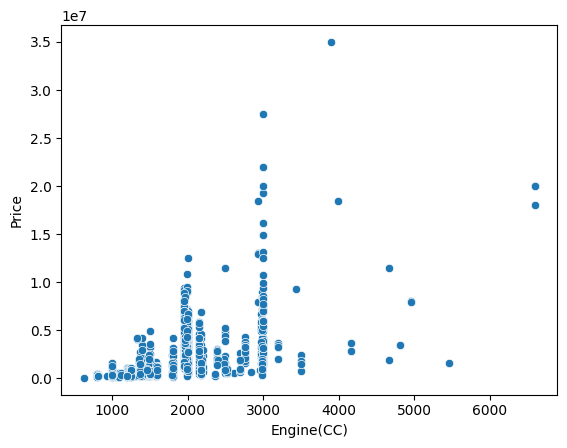

In [51]:
sn.scatterplot(data=df,x='Engine(CC)',y='Price')
plt.show()

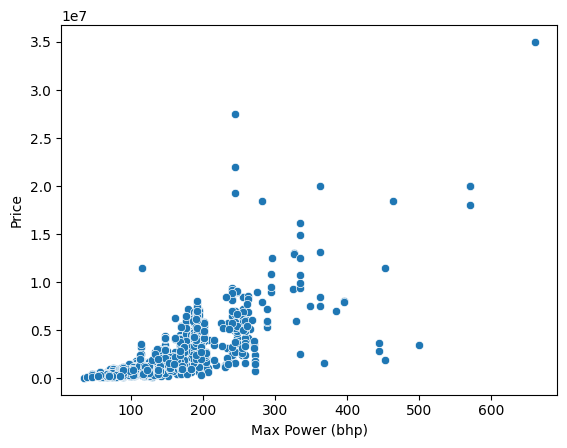

In [52]:
sn.scatterplot(data=df,x='Max Power (bhp)',y='Price')
plt.show()

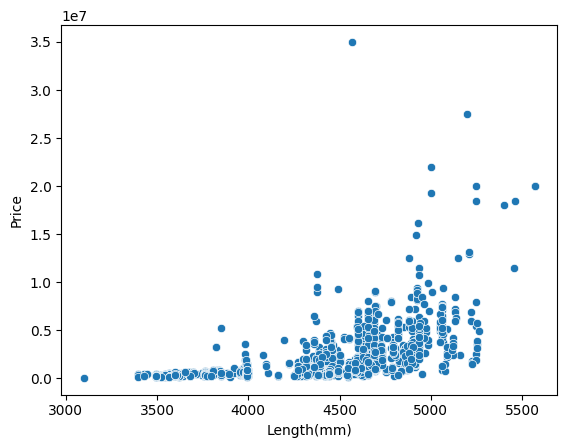

In [53]:
sn.scatterplot(data=df,x='Length(mm)',y='Price')
plt.show()

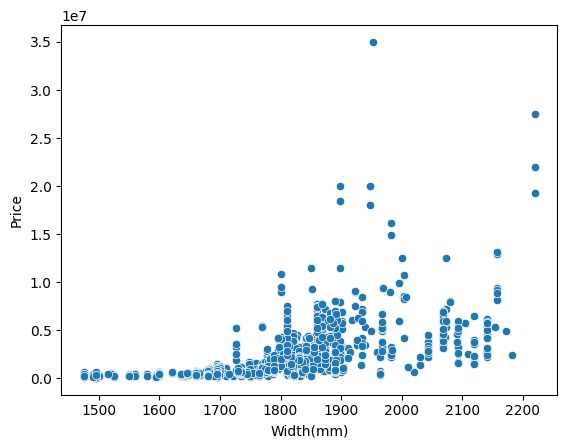

In [54]:
sn.scatterplot(data=df,x='Width(mm)',y='Price')
plt.show()

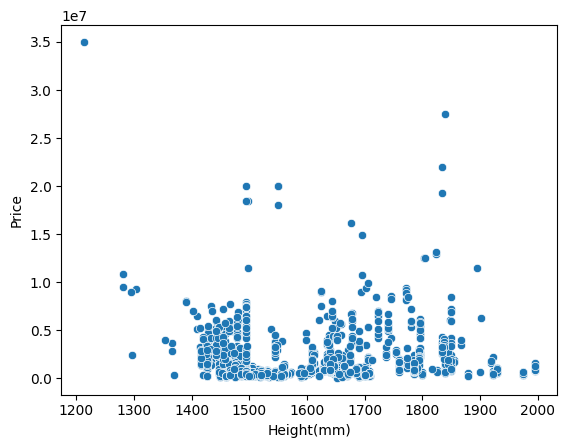

In [55]:
sn.scatterplot(data=df,x='Height(mm)',y='Price')
plt.show()

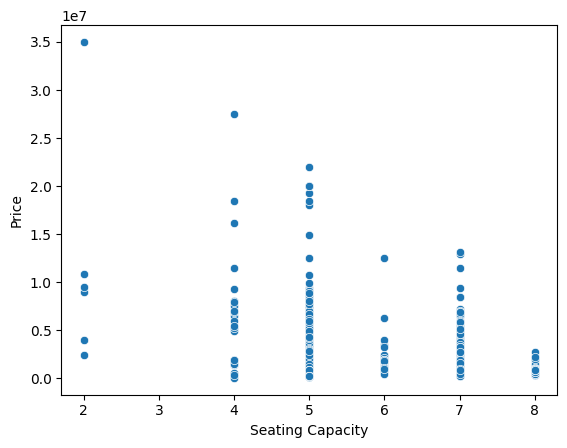

In [56]:
sn.scatterplot(data=df,x='Seating Capacity',y='Price')
plt.show()

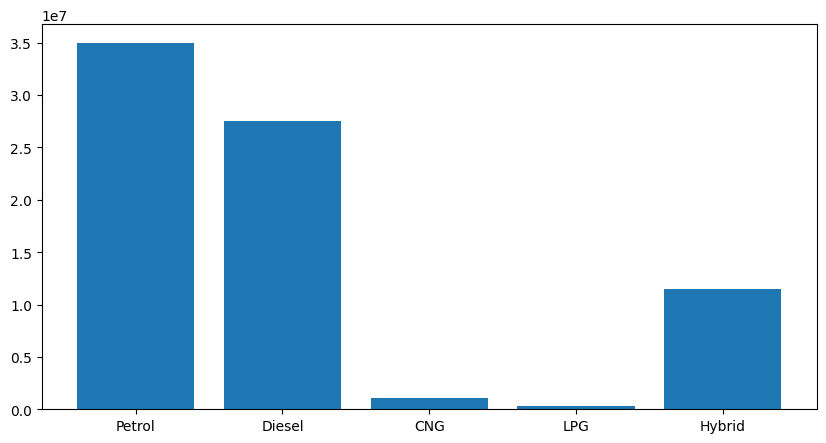

In [57]:
plt.figure(figsize=(10,5))
plt.bar(data=df,x='Fuel Type',height='Price',)
plt.show()

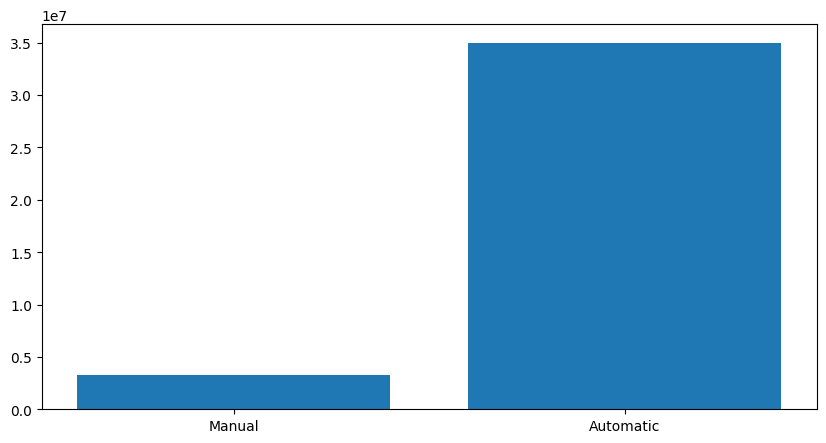

In [58]:
plt.figure(figsize=(10,5))
plt.bar(data=df,x='Transmission',height='Price')
plt.show()

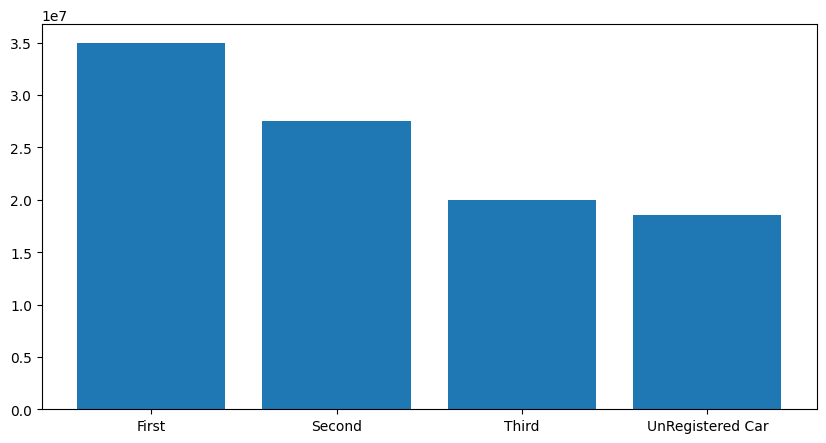

In [59]:
plt.figure(figsize=(10,5))
plt.bar(data=df,x='Owner',height='Price')
plt.show()

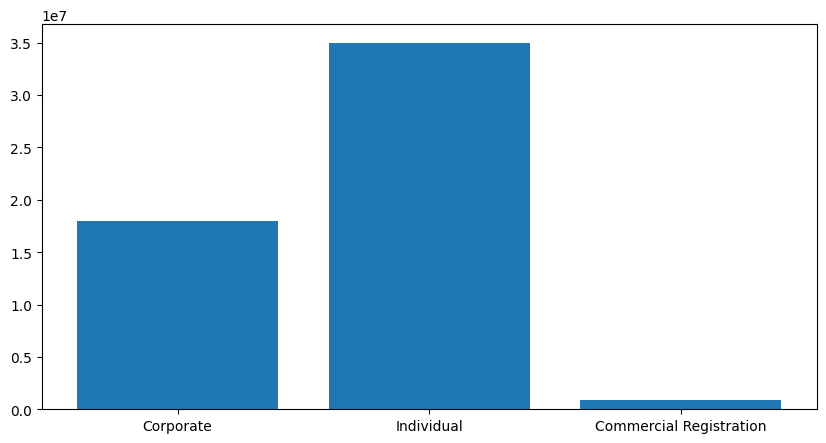

In [60]:
plt.figure(figsize=(10,5))
plt.bar(data=df,x='Seller Type',height='Price')
plt.show()

C:\Users\meetn\AppData\Local\Temp\ipykernel_2724\2162858153.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sn.distplot(df['Price'])
c:\Users\meetn\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Price', ylabel='Density'>

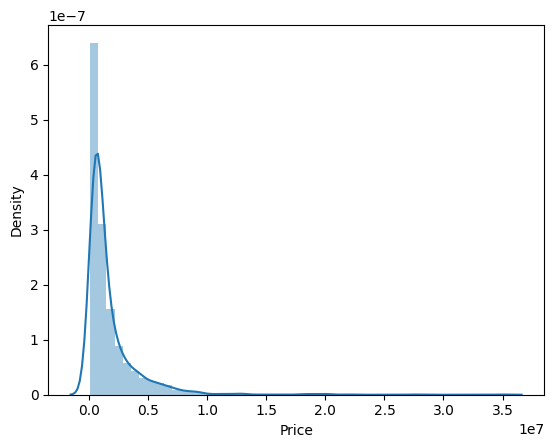

In [61]:
sn.distplot(df['Price'])

So our Price Column is Skewed for fixing that

C:\Users\meetn\AppData\Local\Temp\ipykernel_2724\589762661.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sn.distplot(np.log(df['Price']))
c:\Users\meetn\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Price', ylabel='Density'>

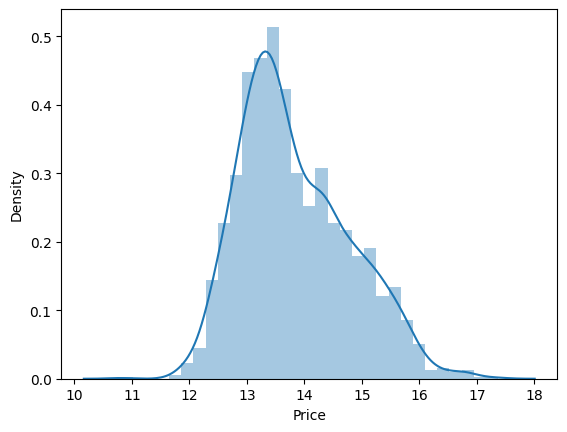

In [62]:
sn.distplot(np.log(df['Price']))

# Model Training

In [63]:
x = df.drop('Price',axis=1)
y = np.log(df['Price'])

In [64]:
x.head()

,Make,Year,Kilometer,Fuel Type,Transmission,Owner,Seller Type,Engine(CC),Max Power (bhp),Max Torque(nm),Drivetrain,Length(mm),Width(mm),Height(mm),Seating Capacity,Fuel Tank Capacity(Litre),Power RPM,Torque RPM
0,Honda,2017,87150,Petrol,Manual,First,Corporate,1198,87.0,109.0000,FWD,3990.0,1680.0,1505.0,5.0,35.0,6000,4500
1,Maruti Suzuki,2014,75000,Diesel,Manual,Second,Individual,1248,74.0,190.0000,FWD,3995.0,1695.0,1555.0,5.0,42.0,4000,2000
2,Hyundai,2011,67000,Petrol,Manual,First,Individual,1197,79.0,112.7619,FWD,3585.0,1595.0,1550.0,5.0,35.0,6000,4000
3,Toyota,2019,37500,Petrol,Manual,First,Individual,1197,82.0,113.0000,FWD,3995.0,1745.0,1510.0,5.0,37.0,6000,4200
4,Toyota,2018,69000,Diesel,Manual,First,Individual,2393,148.0,343.0000,RWD,4735.0,1830.0,1795.0,7.0,55.0,3400,1400


Importing Librarires

In [68]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score,mean_absolute_error

Splitting Dataset into Train Test

In [66]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=50)

Linear Regression

In [67]:
step1 = ColumnTransformer(transformers=[('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,3,4,5,6,10])],remainder='passthrough')

step2 = LinearRegression()

pipe_linear = Pipeline([('step1',step1),('step2',step2)])

pipe_linear.fit(x_train,y_train)

y_predict = pipe_linear.predict(x_test)

print('R2 Score',r2_score(y_test,y_predict))
print('MAR',mean_absolute_error(y_test,y_predict))

linear_score =cross_val_score(estimator=pipe_linear,X=x,y=y,cv=10)

print(f'Cross Val Score Average: {linear_score.mean()}')

c:\Users\meetn\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
c:\Users\meetn\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
c:\Users\meetn\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
c:\Users\meetn\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocess

R2 Score 0.9231893517084173
MAR 0.17579112288629217


Cross Val Score Average: 0.9310037743525191


c:\Users\meetn\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
c:\Users\meetn\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
c:\Users\meetn\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


K-Nearest Neighbors Score

In [71]:
step1 = ColumnTransformer(transformers=[('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,3,4,5,6,10])],remainder='passthrough')

step2 = KNeighborsRegressor(n_neighbors=10)

pipe_neighbors = Pipeline([('step1',step1),('step2',step2)])

pipe_neighbors.fit(x_train,y_train)

y_predict = pipe_neighbors.predict(x_test)

print('R2 Score',r2_score(y_test,y_predict))
print('MAR',mean_absolute_error(y_test,y_predict))

neigbors_score =cross_val_score(estimator=pipe_neighbors,X=x,y=y,cv=10)

print(f'Cross Val Score Average: {neigbors_score.mean()}')

c:\Users\meetn\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
c:\Users\meetn\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
c:\Users\meetn\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
c:\Users\meetn\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocess

R2 Score 0.6025329110957278
MAR 0.46162183189360956
Cross Val Score Average: 0.6306601506477024


c:\Users\meetn\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
c:\Users\meetn\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Decision Tree

In [72]:
step1 = ColumnTransformer(transformers=[('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,3,4,5,6,10])],remainder='passthrough')

step2 = DecisionTreeRegressor()

pipe_tree = Pipeline([('step1',step1),('step2',step2)])

pipe_tree.fit(x_train,y_train)

y_predict = pipe_tree.predict(x_test)

print('R2 Score',r2_score(y_test,y_predict))
print('MAR',mean_absolute_error(y_test,y_predict))

tree_score =cross_val_score(estimator=pipe_tree,X=x,y=y,cv=10)

print(f'Cross Val Score Average: {tree_score.mean()}')

c:\Users\meetn\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
c:\Users\meetn\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
c:\Users\meetn\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
c:\Users\meetn\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocess

R2 Score 0.9276507187538591
MAR 0.18126636686643766
Cross Val Score Average: 0.9079309134218201


c:\Users\meetn\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
c:\Users\meetn\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
c:\Users\meetn\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
c:\Users\meetn\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocess

Random Forest

In [73]:
step1 = ColumnTransformer(transformers=[('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,3,4,5,6,10])],remainder='passthrough')

step2 = RandomForestRegressor(n_estimators=200)

pipe_forest = Pipeline([('step1',step1),('step2',step2)])

pipe_forest.fit(x_train,y_train)

y_predict = pipe_forest.predict(x_test)

print('R2 Score',r2_score(y_test,y_predict))
print('MAR',mean_absolute_error(y_test,y_predict))

forest_score =cross_val_score(estimator=pipe_forest,X=x,y=y,cv=10)

print(f'Cross Val Score Average: {forest_score.mean()}')

c:\Users\meetn\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


R2 Score 0.9514320682231794
MAR 0.1437785313833349


c:\Users\meetn\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
c:\Users\meetn\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
c:\Users\meetn\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
c:\Users\meetn\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocess

Cross Val Score Average: 0.95052706282051


So we will be using Random Forest 

Exporting Model

In [75]:
import pickle

#exporting model
pickle.dump(pipe_forest,open('model.pkl','wb'))

#exporting dataset
pickle.dump(df,open('data.pkl','wb'))